# COGS 118A- Project Proposal

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Peer Review

You will all have an opportunity to look at the Project Proposals of other groups to fuel your creativity and get more ideas for how you can improve your own projects. 

Both the project proposal and project checkpoint will have peer review.

# Names


- Arjun A
- Abishek S
- Sathija S
- Nik T



# Abstract 
Our project aims to produce a music genre classification model. One potential application of this would be to use the model in conjunction with a song recommendation algorithm to provide the best possible experience on music streaming services. The data we use will represent key compositional elements of each song put into numerical form. For example, beats per minute can be represented as a ratio value and “energy level” can be represented on a scale from 1-10. We will preprocess the data to eliminate features that might confuse attempts at classification such as song duration. This feature pruning will require trial and error to determine what features generalize the best. Performance will be measured by examining accuracy, precision, recall, and F1 score.


# Background

Music Genre Classification is something that has been the subject of research for quite some time now. In today’s complex world, where music is often at the forefront of entertainment forms in the country, there exist countless genres, and subgenres of those genres. People want to know what genre the songs they listen to are, whether it is to find a community or to find songs in a similar style. Especially for prominent music streaming apps such as Spotify or Soundcloud, it is often vital to correctly classify songs, and make playlists based on similar genres, although this could be done manually. 

One technique that was used is analyzing the Mel-frequency cepstral coefficients (MFCCs). These coefficients represent what are called the spectral characteristics of the audio signal, and analyzing these was an initial step into music classification. However, they have their drawbacks. We now know that “musical genres, which should be independent of key, are in fact influenced by the fundamental keys of the instruments involved. As a result, genre classifiers based on the MFCC features will be influenced by the dominant keys of the genre, resulting in poor performance on songs in less common keys”<a name="springer"></a>[<sup>[1]</sup>](#springernote).
https://link.springer.com/chapter/10.1007/978-3-642-17832-0_30

Some of the methods that are used now, and are more in tune with what we will be doing, are building models based on the song’s features, such as the year the song came out, the energy level, the “danceability”, among many other features. Common models that are used in genre classification and similar problems are Decision Trees, KNN models, as well as SVMs.

Although we haven't learnt them in class, Neural Networks are also often used and prove to be very effective here. They can achieve 90% accuracy with their mechanisms as shown here <a name="chowdhury"></a>[<sup>[1]</sup>](#chowdhurynote)
https://www.clairvoyant.ai/blog/music-genre-classification-using-cnn


# Problem Statement

Problem Definition: The task is to classify songs into different genres based on their audio features. Genres could include categories like hip-hop, jazz, classical, etc. The problem is to build a model that can learn patterns and characteristics from audio data and accurately assign a genre label to each song. This problem is well defined and can be addressed through ML techniques.

Potential ML Solution: One potential solution is to use classification models to train on a labeled dataset of songs. The model will learn to recognize patterns in the audio features, such as tempo, rhythm, melodic content, and harmonic structure, that are indicative of different genres. Once trained, the model can predict the genre of unlabeled songs.

Quantifiability: The problem of song genre classification is quantifiable since it can be expressed in mathematical or logical terms. For example, the audio features of each song can be represented as numerical values, and the genre labels can be converted from a categorical variable to a one-hot encoding. The goal is to find a function or model that maps the input audio features to the correct genre label.

Measurability: The problem is measurable since it can be evaluated using performance metrics. Accuracy, precision, recall, and F1 score are metrics we learned in class to assess the performance of classification models. By comparing the predicted genres with the ground truth labels, we can observe and measure the accuracy and effectiveness of the model.

Replicability: By using a consistent dataset, splitting it into training and test sets, and employing the same ML algorithms and evaluation metrics, the experiment can be replicated multiple times. This allows for the assessment of the model's performance across different trials and enables us to compare various approaches or improvements.


# Data


https://www.kaggle.com/datasets/cnic92/spotify-past-decades-songs-50s10s?select=2010.csv

This dataset has around 100 songs per year, with features such as the key, danceability, energy, etc. These are the kind of features that we want. 
- This is just part of one entry:
(title) bad guy,
(artist)Billie Eilish,
(GENRE) electropop,
2019,
135,
43,
70,
11,
10
- the genre attribute will be our target
- we want to get rid of unnecessary features

We want to find similar datasets, as 1000 observations is definitely on the lower end, although manageable.



THE DATASET WE ARE BEGINNING WITH IS THIS: https://www.kaggle.com/datasets/purumalgi/music-genre-classification?resource=download



In [3]:
df = pd.read_csv("Genre_Training.csv")
print("initial size of this DF: ")
print(df.shape)

df.head()

initial size of this DF: 
(17996, 17)


,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


Let's look at one specific observation, just to see what features we are dealing with.

In [4]:
print(df.iloc[0])

Artist Name                                      Bruno Mars
Track Name            That's What I Like (feat. Gucci Mane)
Popularity                                             60.0
danceability                                          0.854
energy                                                0.564
key                                                     1.0
loudness                                             -4.964
mode                                                      1
speechiness                                          0.0485
acousticness                                         0.0171
instrumentalness                                        NaN
liveness                                             0.0849
valence                                               0.899
tempo                                               134.071
duration_in min/ms                                 234596.0
time_signature                                            4
Class                                   

We definitely want to make sure that all column names are in an orderly format, and here some are capitalized and have spaces, while others have underscores and are lowercase. Let's do this now

In [5]:
df.columns= df.columns.str.replace(" ","_").str.lower()
df.head()

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min/ms,time_signature,class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


Let's drop the duplicates and rows with null values. If performance is not as expected, we can bring some of these back, and fill in null values, in order to have more data points.

In [6]:
df = df.dropna()
df = df.drop_duplicates()
df

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min/ms,time_signature,class
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In order to get a very quick peek into which variables have an effect, and which ones may go together, we can take a look at the correlations between each of our input variables. We will only look at the ones with numbers.

<AxesSubplot:>

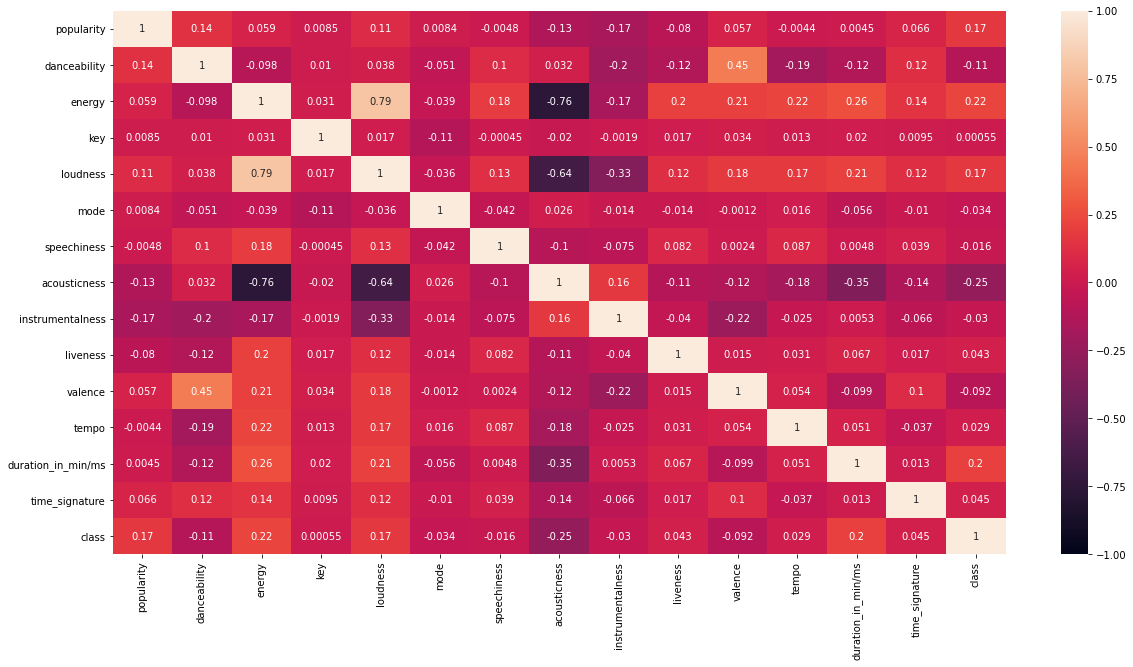

In [7]:
df_for_corr = df.select_dtypes([int,float])

plt.figure(figsize=(20, 10))
sns.heatmap(data = df_for_corr.corr(), vmin = -1, vmax = 1, annot = True) 

From here, we can make some quick observations. For example, we can see that acousticness and energy have the most negative correlation. This makes sense, as if a song is very acoustic, we would naturally expect it to be lower energy. However, besides energy and loudness -- which is again, quite expected -- there doesn't seem to be many others which have a correlation. This simply means that each variable may have its own relavance in regards to identifying the correct class.

# Proposed Solution

We will train both a decision tree as well as a nearest neighbor model in order to create our final product. Only one of these models will be selected after testing as our final solution. These models are useful for classification problems where there are multiple possible answers as opposed to a binary decision.
The first step will be preprocessing the data and feature selection, with an eye towards which features we foresee being the most predictive in discriminating different genres. This step will also include any encoding on the data.

A nearest neighbor approach would suffer from utilizing too many features as this would increase the dimensionality of the decision space. It may be important to include many different features in order to discern one genre from another and for this reason we foresee our decision tree performing much better as it does not suffer from such drawbacks.

Cross-validation will be used to tune the hyperparameters of both models. Examples of such hyperparameters are the depth of the decision tree and the number of neighbors in our nearest neighbor model. We will also evaluate the confusion matrix of both models in order to better understand what kinds of errors are occurring.
We will not be comparing our results to a benchmark model, rather we will test our models performance by aiming to minimize misclassification errors as well as examining their accuracy, precision, recall, and F1 score.



# Evaluation Metrics

In this classification model, we plan on using the following evaluation metrics:

- Accuracy
- (TP + TN) / (TP + TN + FP + FN)


- Precision
- TP / (TP + FP)


- Recall
- TP / (TP + FN)


- F1 Score
- (2 * Precision * Recall) / (Precision + Recall)

We will use these metrics to evaluate the performance of both the benchmark model and the solution model.


# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set_style("darkgrid")
sns.set_context("notebook")

In [9]:
df.head()

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min/ms,time_signature,class
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2


In [10]:
regularized_df = df
regularized_df.head()

def regularize(column):
    max_value = column.max()
    column = column / max_value
    return column

regularized_df['danceability'] = regularize(regularized_df['danceability'])
regularized_df['loudness'] = regularize(regularized_df['loudness'])
regularized_df['speechiness'] = regularize(regularized_df['speechiness'])
regularized_df['danceability'] = regularize(regularized_df['danceability'])
regularized_df

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min/ms,time_signature,class
1,Boston,Hitch a Ride,54.0,0.386249,0.814,3.0,-5.335793,1,0.043422,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.438827,0.614,6.0,-6.150554,1,0.056150,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.168857,0.975,2.0,-3.157934,1,0.231016,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.237614,0.977,6.0,0.647970,1,0.114439,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.681496,0.658,5.0,-7.119557,0,0.111230,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.167846,0.109,7.0,-12.619926,0,0.044171,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.645096,0.223,11.0,-7.508487,0,0.035187,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.564206,0.981,4.0,-3.456089,0,0.076150,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.217391,0.805,6.0,-9.414760,0,0.143316,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [11]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['artist_name', 'track_name', 'class'])
#X = df[df['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
#X = df.drop(columns = ['artist_name', 'track_name', 'popularity', 'class', 'mode', 'duration_in_min/ms', 'time_signature'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = GradientBoostingClassifier()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4975634778148243


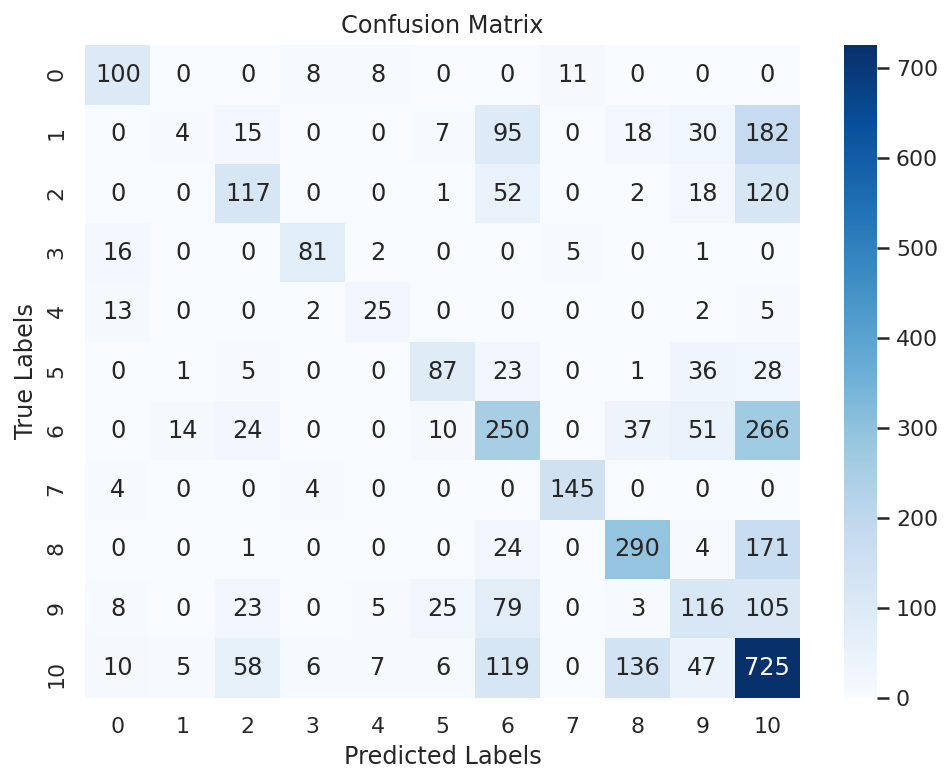

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.79      0.72       127
           1       0.17      0.01      0.02       351
           2       0.48      0.38      0.42       310
           3       0.80      0.77      0.79       105
           4       0.53      0.53      0.53        47
           5       0.64      0.48      0.55       181
           6       0.39      0.38      0.39       652
           7       0.90      0.95      0.92       153
           8       0.60      0.59      0.59       490
           9       0.38      0.32      0.35       364
          10       0.45      0.65      0.53      1119

    accuracy                           0.50      3899
   macro avg       0.55      0.53      0.53      3899
weighted avg       0.47      0.50      0.47      3899



In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)


In [34]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)

print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test)


Best parameters:  {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Best accuracy:  0.2756299398395315


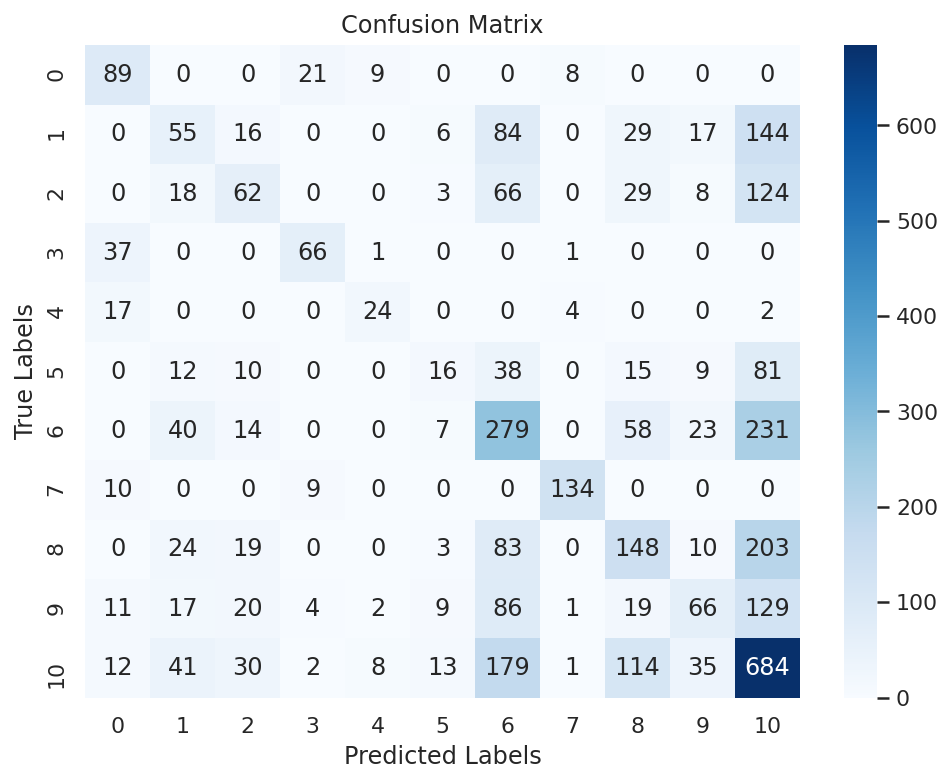

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.70      0.59       127
           1       0.27      0.16      0.20       351
           2       0.36      0.20      0.26       310
           3       0.65      0.63      0.64       105
           4       0.55      0.51      0.53        47
           5       0.28      0.09      0.13       181
           6       0.34      0.43      0.38       652
           7       0.90      0.88      0.89       153
           8       0.36      0.30      0.33       490
           9       0.39      0.18      0.25       364
          10       0.43      0.61      0.50      1119

    accuracy                           0.42      3899
   macro avg       0.46      0.43      0.43      3899
weighted avg       0.40      0.42      0.39      3899



In [35]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

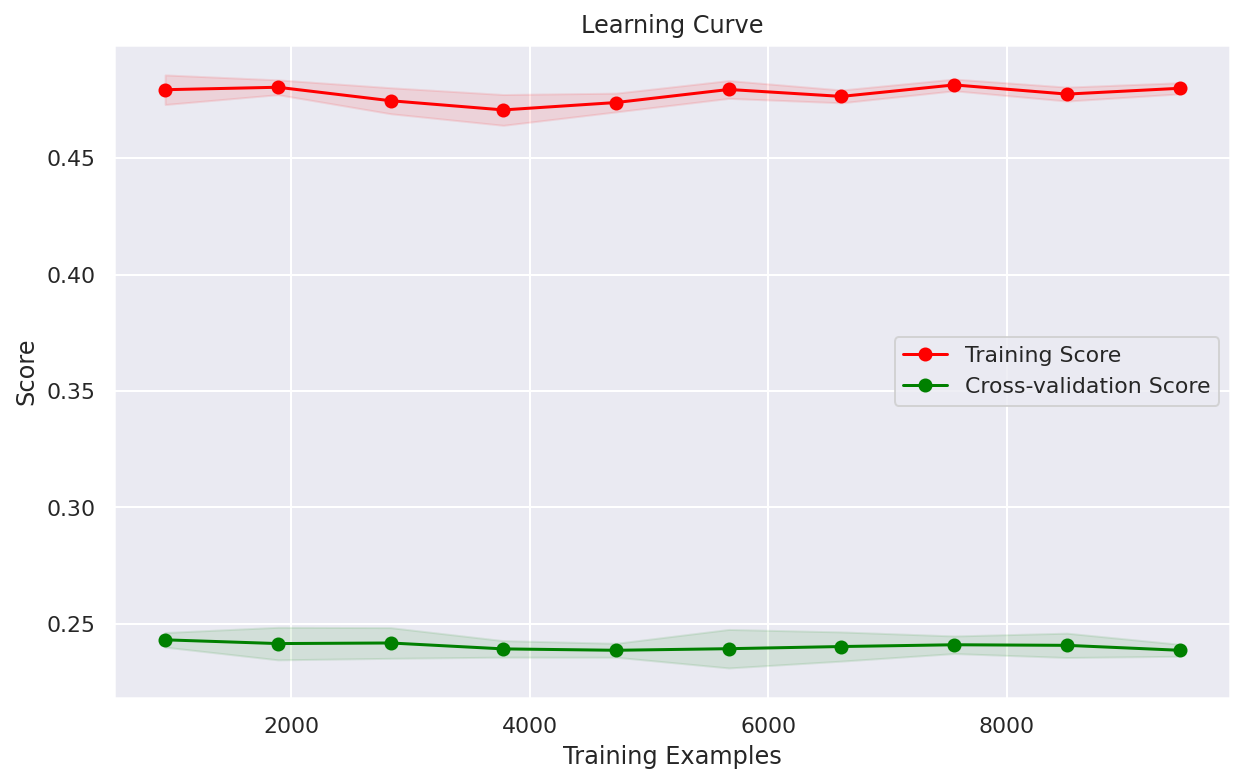

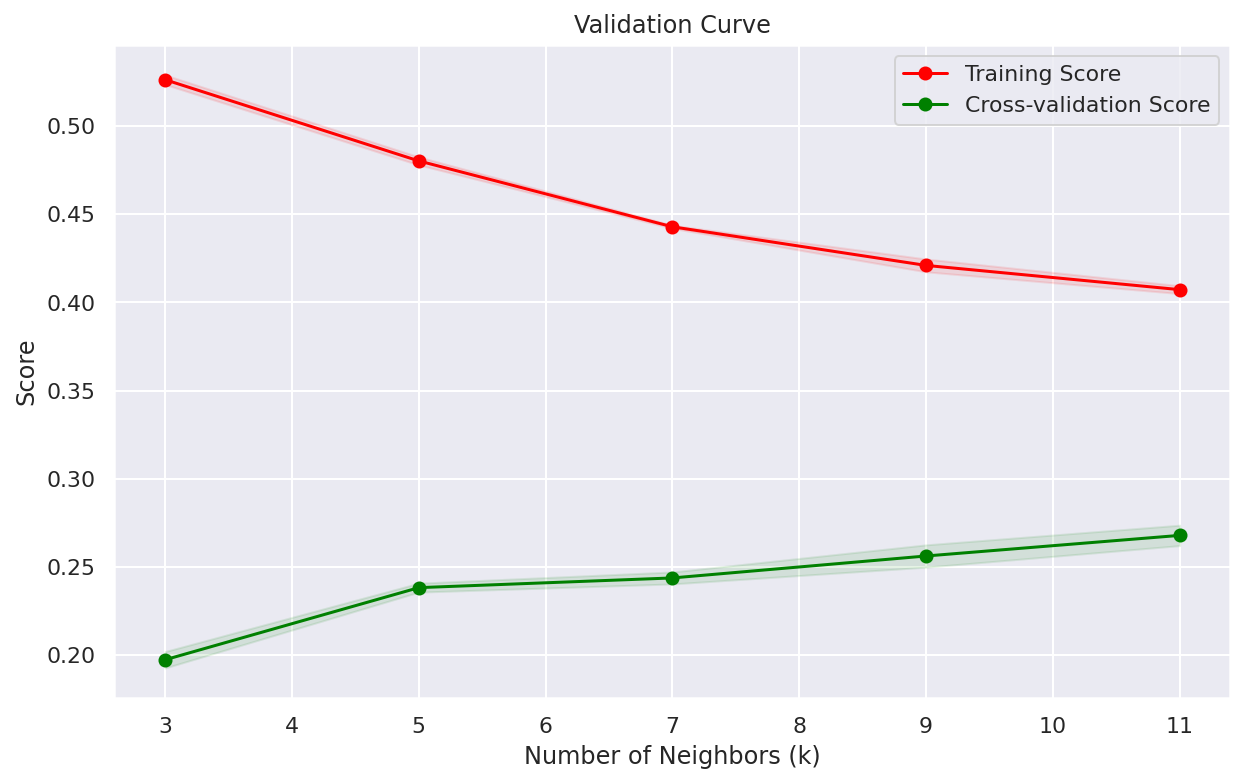

In [36]:
train_sizes, train_scores, test_scores = learning_curve(knn, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation Score')
plt.legend(loc='best')
plt.show()

# Validation curve
param_range = [3, 5, 7, 9, 11]  # Number of neighbors to test
train_scores, test_scores = validation_curve(knn, X, y, param_name='n_neighbors', param_range=param_range, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title('Validation Curve')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.plot(param_range, train_mean, 'o-', color='r', label='Training Score')
plt.plot(param_range, test_mean, 'o-', color='g', label='Cross-validation Score')
plt.legend(loc='best')
plt.show()

In [37]:
param_grid = {
    'max_depth': [None, 3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

tree = DecisionTreeClassifier()

grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X, y)

best_tree = grid_search.best_estimator_
y_pred_tree = best_tree.predict(X_test)

# Print the best parameter combination and the corresponding accuracy
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best parameters:  {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best accuracy:  0.455768492741793


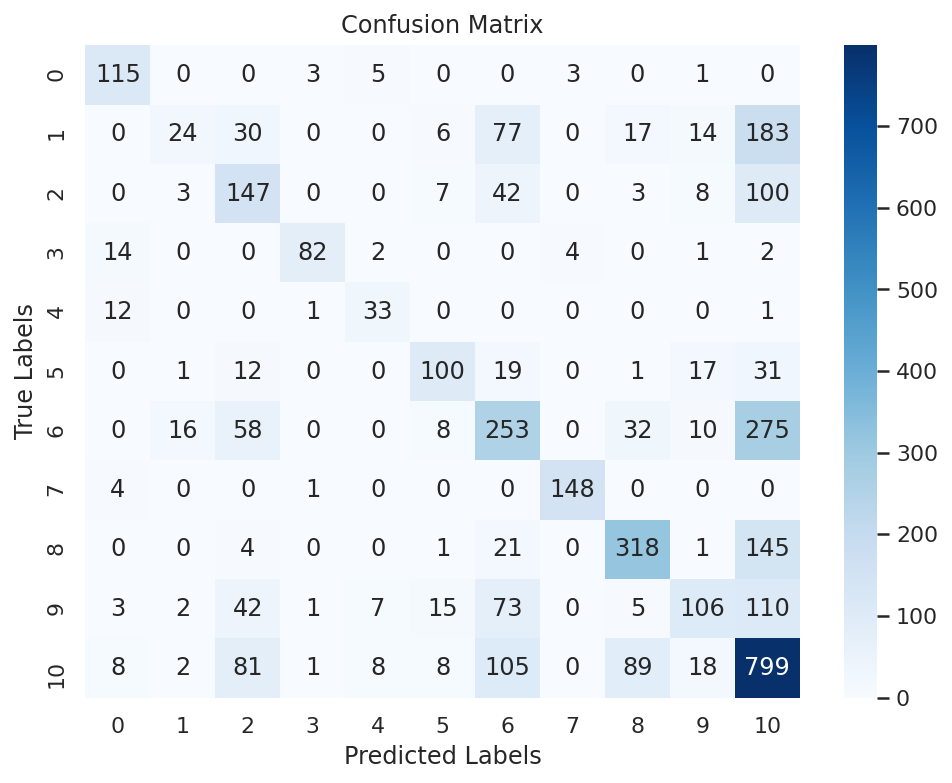

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.70      0.59       127
           1       0.27      0.16      0.20       351
           2       0.36      0.20      0.26       310
           3       0.65      0.63      0.64       105
           4       0.55      0.51      0.53        47
           5       0.28      0.09      0.13       181
           6       0.34      0.43      0.38       652
           7       0.90      0.88      0.89       153
           8       0.36      0.30      0.33       490
           9       0.39      0.18      0.25       364
          10       0.43      0.61      0.50      1119

    accuracy                           0.42      3899
   macro avg       0.46      0.43      0.43      3899
weighted avg       0.40      0.42      0.39      3899



In [38]:
# Confusion Matrix for Decision Tree
cm = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)


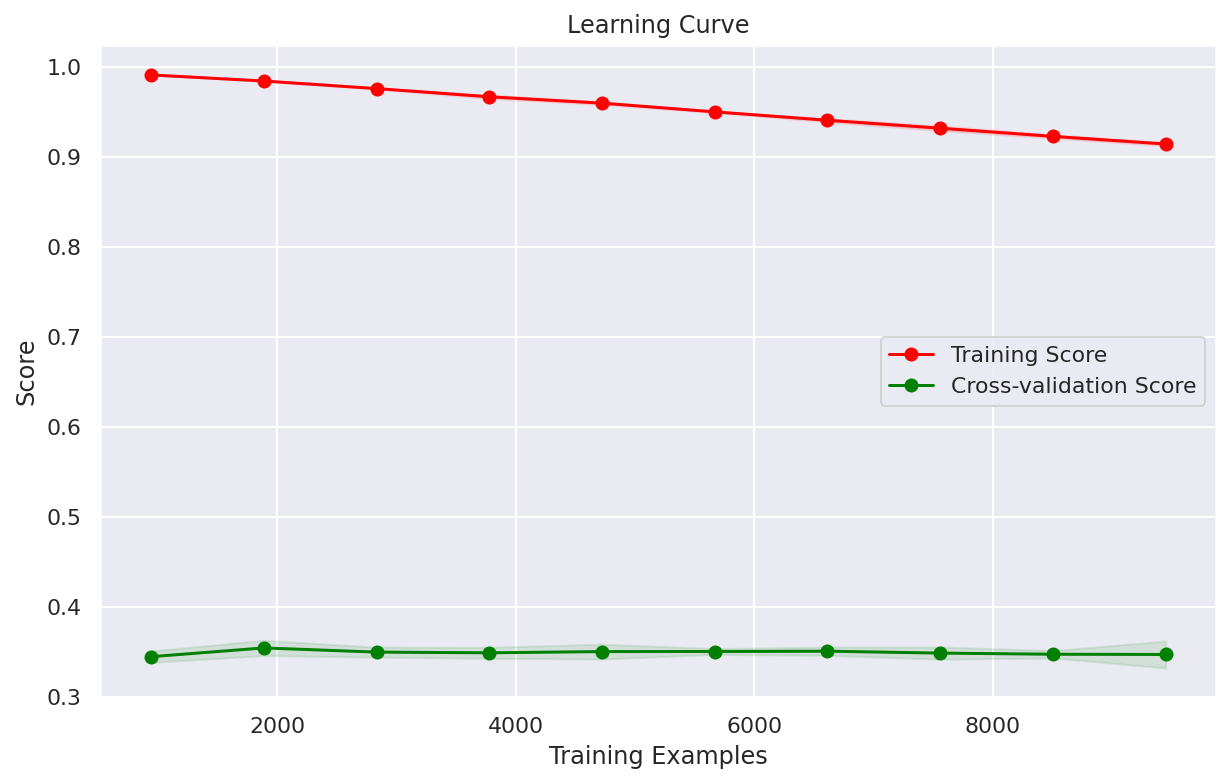

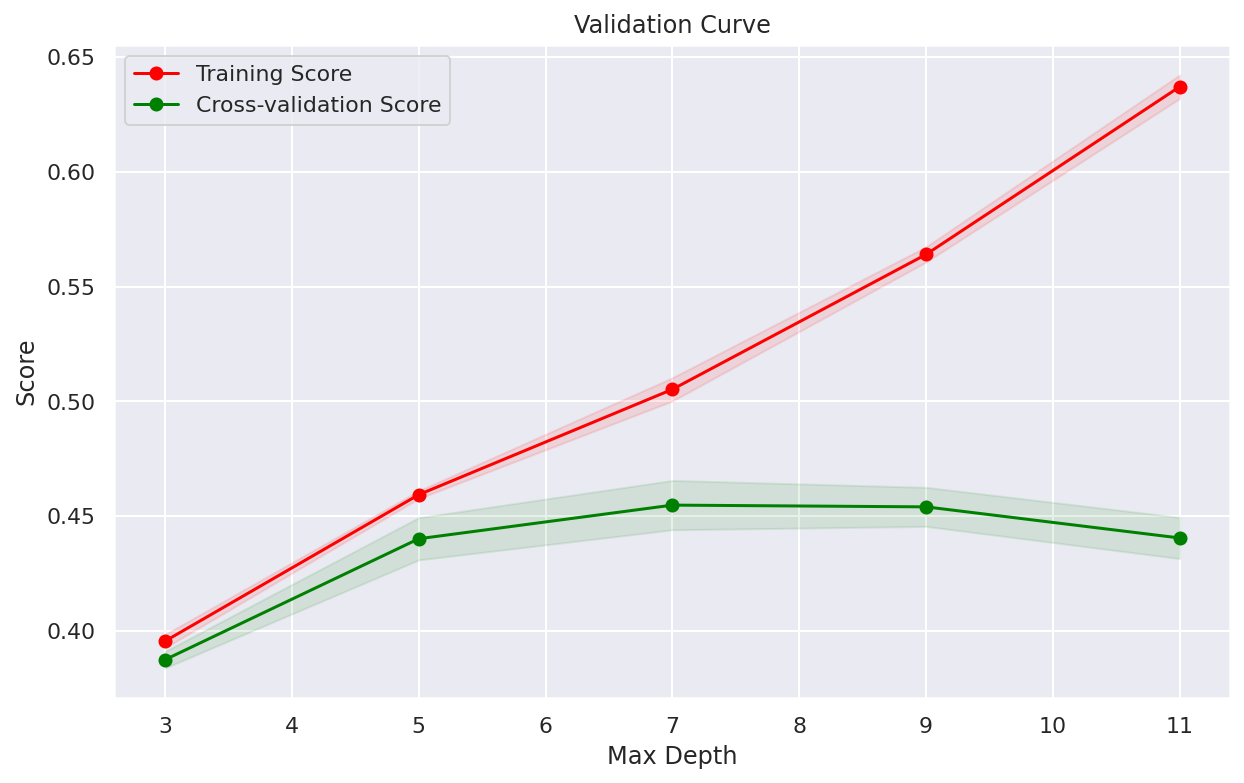

In [26]:
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(tree, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation Score')
plt.legend(loc='best')
plt.show()

# Validation curve
param_range = [3, 5, 7, 9, 11]  # Max depth of the decision tree to test
train_scores, test_scores = validation_curve(tree, X, y, param_name='max_depth', param_range=param_range, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title('Validation Curve')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.plot(param_range, train_mean, 'o-', color='r', label='Training Score')
plt.plot(param_range, test_mean, 'o-', color='g', label='Cross-validation Score')
plt.legend(loc='best')
plt.show()

# Ethics & Privacy

The dataset we are using is directly from Kaggle that lists certain attributes in songs taken from a publicly available playlist in Spotify, an audio streaming platform. However, there may be some ethical concerns that arise within a music genre classification model. One issue to address is the ethical concerns around misrepresentation for specific genres. Since we are looking into certain attributes in songs to develop a model that can accurately predict the genre of a given song based on its audio features, we may misrepresent the song to a specific genre that might also fit under another genre. This can lead to disagreements among experts and listeners about specific genre classifications and what criteria should be used to classify each song. The model should acknowledge this subjectivity and inherent diversity in musical tastes, to ultimately avoid oversimplification or misrepresentation of complex genres.

An unintended consequence of this ML model could be music genre bias where the training data being used is biased towards specific genres and not all. We must be careful to ensure the model is trained on diverse and representative data to address and mitigate this bias.


# Team Expectations 

- Communication: We should all maintain open and effective communication channels within the team. We all need to respond to messages in a timely manner and actively participate in team discussions and meetings.
- Attendance and Punctuality: All members need to attend all team Zoom calls, and arrive on time. If someone is unable to attend, they need to provide advance notice and make sure they catch up on the topics they missed.
- Respect: Treat all team members with respect and ensure that everyone’s opinions are considered.
- Work Quality: Everyone should work on this group project as if it was their own. We should strive to ensure that we try our best to create the highest quality of work for this class.  


# Project Timeline Proposal


| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5/17  |  9 AM |  Found topics  | Discuss which topic to work on| 
| 5/13 |  10 AM |  Started Checkpoint Work | Discuss what to change / meeting times | 
| 5/30 |  10 AM |  Finished Checkpoint Work | Finished doing cross validation | 
| 6/13  | 12 PM  | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project |
| 6/14  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="springernote"></a>1.[^](#springer): https://link.springer.com/chapter/10.1007/978-3-642-17832-0_30
<a name="chowdhurynote"></a>2.[^](#chowdhury): https://www.clairvoyant.ai/blog/music-genre-classification-using-cnn

